In [89]:
%matplotlib inline

In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [91]:
df = pd.read_csv('./dataAugmented.csv')

In [92]:
df.shape

(117, 7)

In [93]:
df = df.sort_values('WinOrLose')

In [94]:
df.head()

,MarksSimilarity,VisualSimilarity,AuralSimilarity,ConceptualSimilarity,G&SSimilarity,LikelyhoodOfConfusion,WinOrLose
58,5.000000,6.000000,2.0,2.0,-0.702663,2.000000,0
81,3.462197,3.000000,6.0,3.0,3.000000,-1.000000,0
77,3.000000,3.000000,3.0,1.0,-1.000000,-0.652135,0
76,3.765584,3.000000,3.0,3.0,-1.000000,-1.000000,0
74,5.000000,7.654207,3.0,4.0,7.000000,2.000000,0


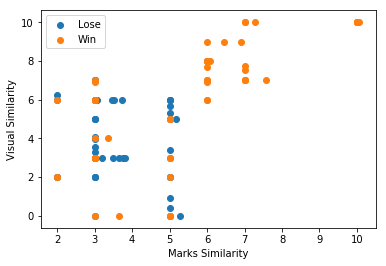

In [95]:
plt.scatter(df[:60].MarksSimilarity, df[:60].AuralSimilarity, label='Lose')
plt.scatter(df[-60:].MarksSimilarity, df[-60:].AuralSimilarity, label='Win')
plt.xlabel('Marks Similarity')
plt.ylabel('Visual Similarity')
plt.legend(loc='best')

In [97]:
X = df.drop(labels=['WinOrLose'], axis=1).values
Y = df.WinOrLose.values

In [98]:
# set seed for numpy and tensorflow
# set for reproducible results
seed = 5
np.random.seed(seed)
tf.set_random_seed(seed)

In [102]:
# set replace=False, Avoid double sampling
trainIndex = np.random.choice(len(X), round(len(X) * 0.8), replace=False)

In [103]:
# diff set
testIndex = np.array(list(set(range(len(X))) - set(trainIndex)))
trainX = X[trainIndex]
trainY = Y[trainIndex]
testX = X[testIndex]
testY = Y[testIndex]

In [110]:
# normalization
def min_max_normalized(data):
    colMax = np.max(data, axis=0)
    colMin = np.min(data, axis=0)
    return np.divide(data - colMin, colMax - colMin)

In [111]:
trainX = min_max_normalized(trainX)
testX = min_max_normalized(testX)

In [112]:
W = tf.Variable(tf.random_normal(shape=[6, 1]), name='W')
b = tf.Variable(tf.random_normal(shape=[1, 1]), name= 'b')
init = tf.global_variables_initializer()

In [113]:
data = tf.placeholder(dtype=tf.float32, shape=[None, 6])
target = tf.placeholder(dtype=tf.float32, shape=[None, 1])

In [114]:
# model
model = tf.matmul(data, W) + b

In [115]:
# cross-entropy loss function
loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=model, labels=target))

In [116]:
# learning rate， batch_size etc.
learning_rate = 0.003
batch_size = 40
iter_num = 10000

In [117]:
# optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate)

In [118]:
# Define the goal
goal = optimizer.minimize(loss)

In [119]:
# accuracy
prediction = tf.round(tf.sigmoid(model))
correct = tf.cast(tf.equal(prediction, target), dtype=tf.float32)
accuracy = tf.reduce_mean(correct)

In [120]:
# results
loss_trace = []
train_acc = []
test_acc = []

In [121]:
sess = tf.Session()
sess.run(init)

In [122]:
# training model
for epoch in range(iter_num):
    batchIndex = np.random.choice(len(trainX), size=batch_size)
    batchTrainX = trainX[batchIndex]
    batchTrainY = np.matrix(trainY[batchIndex]).T
    sess.run(goal, feed_dict={data: batchTrainX, target: batchTrainY})
    temp_loss = sess.run(loss, feed_dict={data: batchTrainX, target: batchTrainY})
    
    temp_train_acc = sess.run(accuracy, feed_dict={data: trainX, target: np.matrix(trainY).T})
    temp_test_acc = sess.run(accuracy, feed_dict={data: testX, target: np.matrix(testY).T})
    
    loss_trace.append(temp_loss)
    train_acc.append(temp_train_acc)
    test_acc.append(temp_test_acc)

    if (epoch + 1) % 300 == 0:
        print('{:d} epoch(loss: {:f} train_acc: {:f} test_acc: {:f})'.format(epoch + 1, temp_loss,
                                                                          temp_train_acc, temp_test_acc))

300 epoch(loss: 0.578191 train_acc: 0.723404 test_acc: 0.826087)
600 epoch(loss: 0.604536 train_acc: 0.734043 test_acc: 0.869565)
900 epoch(loss: 0.541948 train_acc: 0.765957 test_acc: 0.913043)
1200 epoch(loss: 0.512400 train_acc: 0.829787 test_acc: 0.913043)
1500 epoch(loss: 0.576566 train_acc: 0.893617 test_acc: 0.913043)
1800 epoch(loss: 0.515062 train_acc: 0.914894 test_acc: 0.913043)
2100 epoch(loss: 0.517136 train_acc: 0.936170 test_acc: 0.913043)
2400 epoch(loss: 0.457208 train_acc: 0.936170 test_acc: 0.913043)
2700 epoch(loss: 0.433813 train_acc: 0.936170 test_acc: 0.913043)
3000 epoch(loss: 0.478949 train_acc: 0.936170 test_acc: 0.913043)
3300 epoch(loss: 0.470900 train_acc: 0.936170 test_acc: 0.913043)
3600 epoch(loss: 0.428420 train_acc: 0.936170 test_acc: 0.913043)
3900 epoch(loss: 0.404145 train_acc: 0.936170 test_acc: 0.913043)
4200 epoch(loss: 0.386082 train_acc: 0.936170 test_acc: 0.913043)
4500 epoch(loss: 0.416906 train_acc: 0.936170 test_acc: 0.956522)
4800 epoch(lo

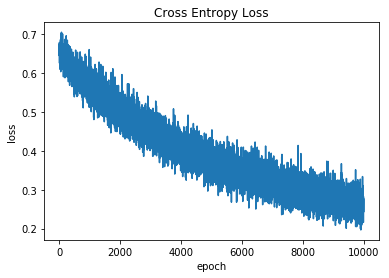

In [123]:
# loss function
plt.plot(loss_trace)
plt.title('Cross Entropy Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

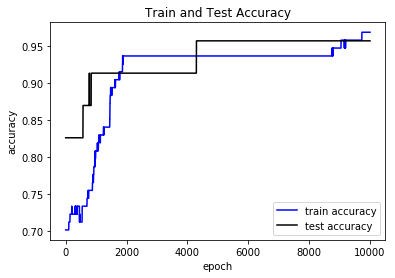

In [124]:
# accuracy
plt.plot(train_acc, 'b-', label='train accuracy')
plt.plot(test_acc, 'k-', label='test accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Train and Test Accuracy')
plt.legend(loc='best')
plt.show()

In [125]:
sess.run(W)

array([[ 0.59277785],
       [ 1.469453  ],
       [-0.16241184],
       [ 0.72341174],
       [ 0.01319833],
       [ 2.1639009 ]], dtype=float32)

In [126]:
sess.run(b)

array([[-2.3646958]], dtype=float32)